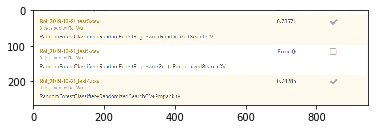

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Capture.PNG",1)
plt.imshow(img)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

data_path = '3rd-ml100marathon-midterm/'
df_train  = pd.read_csv(data_path + 'train_data.csv')
df_test   = pd.read_csv(data_path + 'test_features.csv')

train_Y = df_train['poi'].astype(float)
ids     = df_test['name']

In [86]:
df_train = df_train.drop(['name', 'poi'] , axis=1)
df_test  = df_test.drop(['name'] , axis=1)

In [87]:
df = pd.concat([df_train,df_test])
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [88]:
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data)
    
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


In [89]:
df["salary"]            = df["salary"].fillna(0)
df["total_payments"]    = df["total_payments"].fillna(0)
df["total_stock_value"] = df["total_stock_value"].fillna(0)
df   = df.fillna(0)
na_check(df)

#Feature Improve
#-1
df["with_email"] = df["email_address"].map(lambda s: 0 if s == 0 else 1)
df = df.drop(["email_address"] , axis=1)

,Missing Ratio


In [90]:
train_num = train_Y.shape[0]
df_tmp = pd.concat([df[:train_num],train_Y], axis=1)
corr   = df_tmp.corr()["poi"]
corr.sort_values()

deferred_income             -0.222006
director_fees               -0.117651
deferral_payments           -0.087767
from_messages               -0.082758
from_this_person_to_poi     -0.051991
to_messages                  0.021519
restricted_stock_deferred    0.082723
shared_receipt_with_poi      0.129147
from_poi_to_this_person      0.131200
with_email                   0.216767
long_term_incentive          0.217566
expenses                     0.254843
loan_advances                0.261912
other                        0.270516
restricted_stock             0.279710
total_payments               0.281416
bonus                        0.292556
salary                       0.395342
total_stock_value            0.456709
exercised_stock_options      0.471984
poi                          1.000000
Name: poi, dtype: float64

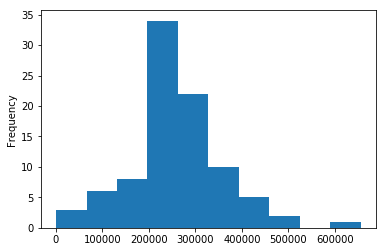

         bonus  deferral_payments  deferred_income  director_fees  \
20  97343619.0         32083396.0      -27992891.0      1398517.0   

    exercised_stock_options   expenses  from_messages  \
20              311764000.0  5235198.0            0.0   

    from_poi_to_this_person  from_this_person_to_poi  loan_advances  \
20                      0.0                      0.0     83925000.0   

    long_term_incentive       other  restricted_stock  \
20           48521928.0  42667589.0       130322299.0   

    restricted_stock_deferred      salary  shared_receipt_with_poi  \
20                 -7576788.0  26704229.0                      0.0   

    to_messages  total_payments  total_stock_value  with_email  
20          0.0     309886585.0        434509511.0           0  


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,with_email,poi
1,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,108.0,88.0,30.0,0.0,...,22122.0,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0,1,1.0
8,7000000.0,202911.0,-300000.0,0.0,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,...,10359729.0,14761694.0,0.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0,1,1.0


In [54]:
df[(df["salary"]!=0) & (df["salary"]<800000)]["salary"].plot(kind='hist', subplots=True)
plt.show()
print(df[df["salary"]>8000000])
#df[df["salary"]!=0]["salary"]
df_tmp[df_tmp["salary"]>800000]